In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def load_and_process_data(filepath):
    """
    Loads the dataset, processes it by computing the Typical Price, and pivots the data.
    """

    commodities_data = pd.read_csv(filepath)

    # Convert date column to datetime format
    commodities_data['date'] = pd.to_datetime(commodities_data['date'])

    # Calculate Typical Price for each record before grouping
    commodities_data['Typical'] = (commodities_data['high'] + commodities_data['low'] + commodities_data['close']) / 3

    # Pivot the data to have commodities as columns and date as index
    commodities_pivot = commodities_data.pivot(index='date', columns='commodity', values='Typical')
    commodities_pivot.dropna(inplace=True)

    return commodities_pivot


def display_statistics(commodities_pivot):
    """
    Displays descriptive statistics and correlation matrix for the Typical Prices.
    """
    typical_stats = commodities_pivot.describe()
    correlation_matrix = commodities_pivot.corr().fillna(0)

    print("Typical Price Statistics:\n", typical_stats)
    print("\nCorrelation Matrix:\n", correlation_matrix)

    return correlation_matrix


def plot_histograms(commodities_pivot):
    """
    Plots histograms with KDE for the first 5 commodities.
    """
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()

    for i, commodity in enumerate(commodities_pivot.columns[:5]):
        sns.histplot(commodities_pivot[commodity], bins=50, kde=True, color='blue', alpha=0.5, edgecolor='black', ax=axes[i])
        axes[i].set_title(f"Histogram of {commodity} Prices with KDE Line")
        axes[i].set_xlabel("Typical Price (USD)")
        axes[i].set_ylabel("Frequency")
        axes[i].grid(True)

    if len(commodities_pivot.columns) < 6:
        axes[-1].axis('off')

    plt.tight_layout()
    plt.show()


def plot_line_chart(commodities_pivot):
    """
    Plots a line chart of Typical Prices over time.
    """
    plt.figure(figsize=(12, 6))
    for commodity in commodities_pivot.columns:
        plt.plot(commodities_pivot.index, commodities_pivot[commodity], label=commodity)

    plt.title("Typical Price Trends Over Time")
    plt.xlabel("Year")
    plt.ylabel("Typical Price (USD)")
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_heatmap(correlation_matrix):
    """
    Plots a heatmap of the correlation matrix.
    """
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
    plt.title("Heatmap of Commodity Price Correlations")
    plt.show()


Typical Price Statistics:
 commodity       Copper         Gold    Palladium     Platinum       Silver
count      5011.000000  5011.000000  5011.000000  5011.000000  5011.000000
mean          2.745310  1207.199168   925.751889  1060.680582    17.601571
std           1.142199   556.676795   649.488575   350.470132     8.709414
min           0.605833   255.733337   149.166667   413.400004     4.026000
25%           2.076917   703.733327   474.299988   857.049988    12.309166
50%           2.965000  1281.399984   746.850016   962.700012    17.417000
75%           3.601417  1661.800008  1117.599976  1326.016703    23.227833
max           5.112667  2426.466634  3060.099935  2251.100098    48.438000

Correlation Matrix:
 commodity    Copper      Gold  Palladium  Platinum    Silver
commodity                                                   
Copper     1.000000  0.879644   0.539827  0.676877  0.880084
Gold       0.879644  1.000000   0.677028  0.456101  0.862169
Palladium  0.539827  0.677028   

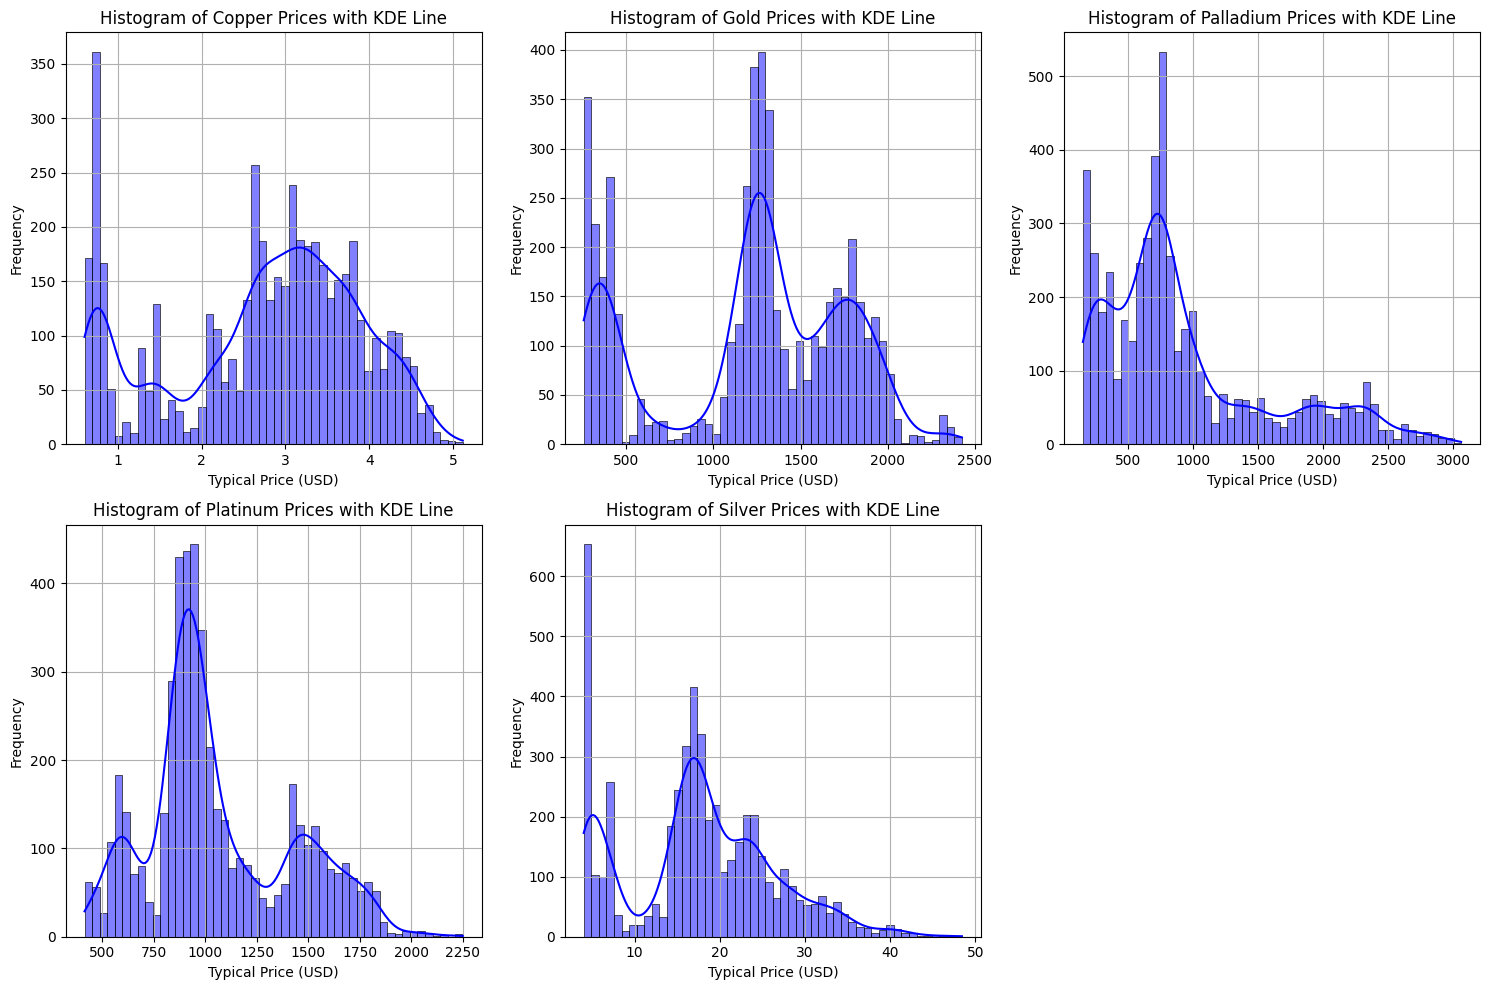

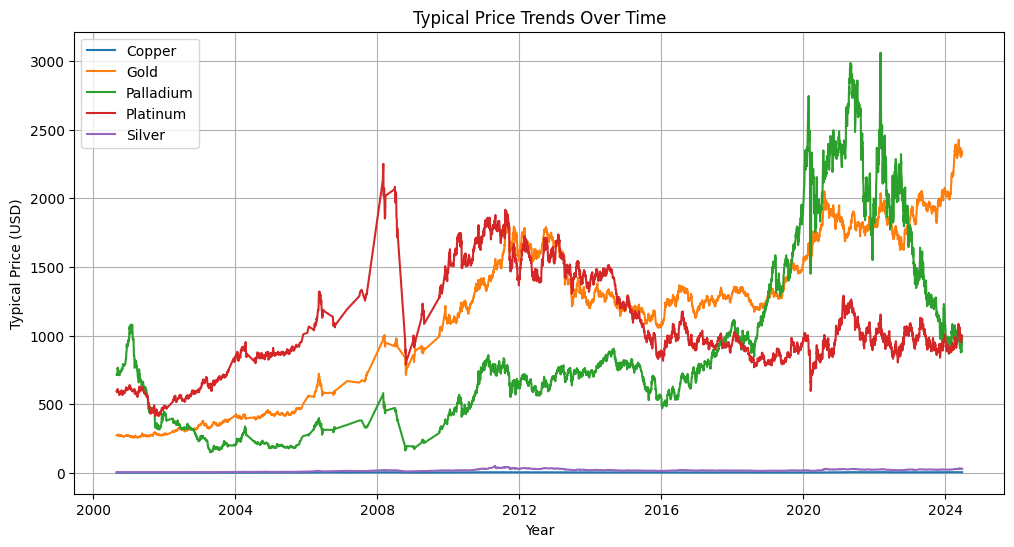

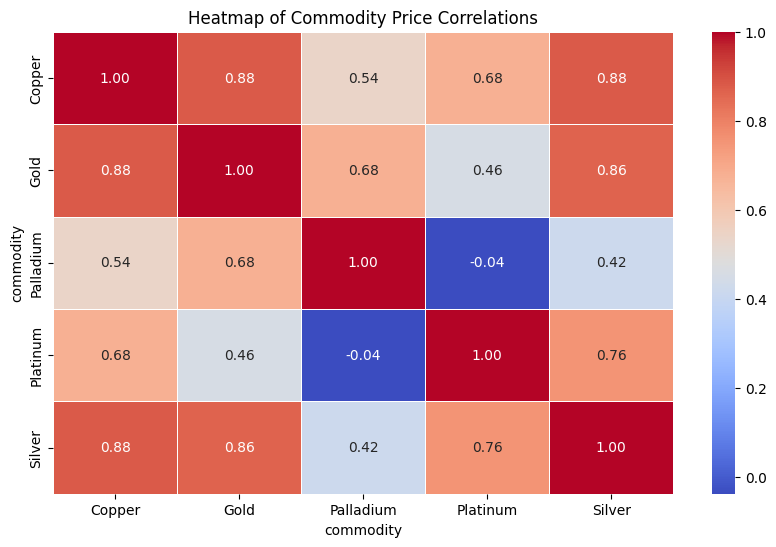

In [5]:
filepath = "all_commodities_data.csv"

commodities_pivot = load_and_process_data(filepath)
correlation_matrix = display_statistics(commodities_pivot)
plot_histograms(commodities_pivot)
plot_line_chart(commodities_pivot)
plot_heatmap(correlation_matrix)